Author: DHCNTT17A_Đặng Khôi Nguyên_22642441

Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Đọc dữ liệu lên dataframe 

In [10]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên 

3. Đổi tên các cột dữ liệu cần thiết 

In [11]:
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name' : 'MarketingName'}, inplace=True)

4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng <br>
kết quả có các cột sau: [`outgoing_mins_per_month`, `outgoing_sms_per_month`, `monthly_mb`, `use_id`, `platform`, `device`] 

In [12]:
dfKetQua = pd.merge(nguoidung_sudung, 
                    nguoidung_thietbi[['use_id', 'platform', 'device']], 
                    on='use_id')

In [13]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên 

In [15]:
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding', 'Model']],
                    left_on='device',
                    right_on='Model')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT 

In [16]:
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
sử dụng của các nhãn hàng

In [17]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


8. Trực quan số lượng người dùng các nhãn hàng 

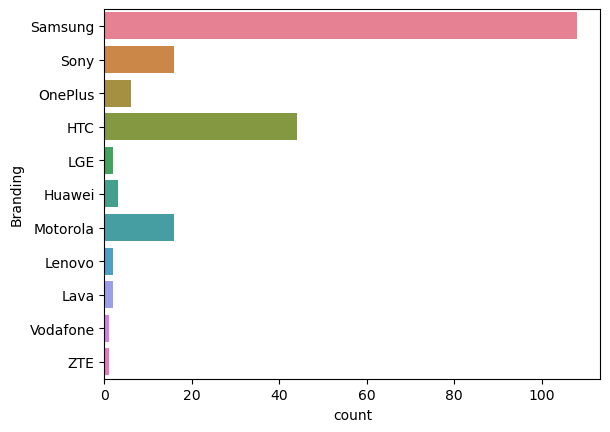

In [22]:
sns.countplot(y='Branding', data=dfKetQua, hue='Branding')
plt.show()

9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
từng nhóm nhãn hàng bán lẻ 

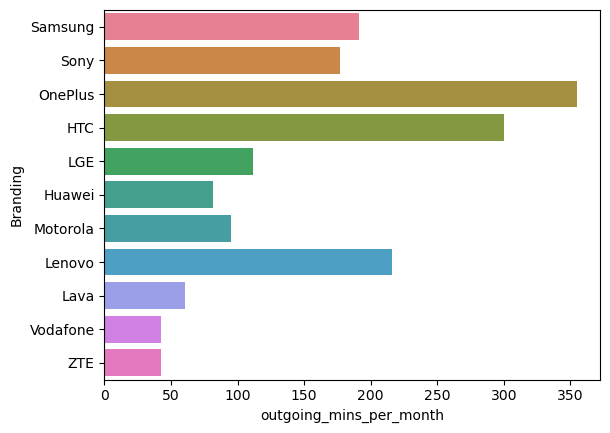

In [58]:
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, hue='Branding', errorbar=None)
plt.show()

10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng 

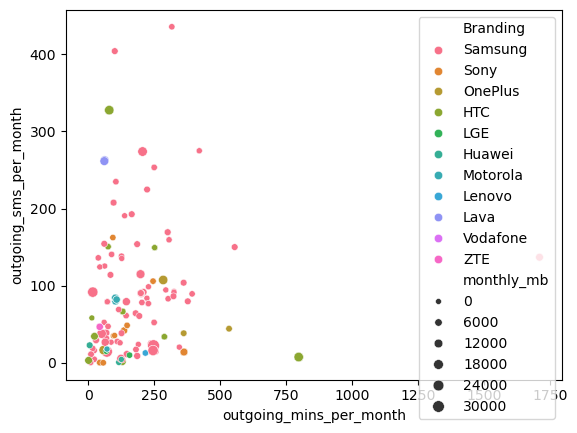

In [29]:
sns.scatterplot(x='outgoing_mins_per_month', 
                y='outgoing_sms_per_month', 
                data=dfKetQua, 
                hue='Branding', 
                size='monthly_mb'
)
plt.show()

11. Hãy kiểm định xem trung bình `outgoing_mins_per_month` có bằng 200 phút

In [32]:
import scipy.stats as stats

stats.ttest_1samp(dfKetQua['outgoing_mins_per_month'], popmean=200)

TtestResult(statistic=0.3678324474067915, pvalue=0.7133871524810331, df=200)

Không có đủ bằng chứng thống kê để khẳng định rằng trung bình của `outgoing_mins_per_month` khác 200 phút.

12. Hãy kiểm định xem trung bình `outgoing_sms_per_month` có bằng 100 tin nhắn 

In [34]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(dfKetQua['outgoing_sms_per_month'], value=100)

(-2.9567085781961198, 0.0031094184670620866)

Trung bình `outgoing_sms_per_month` có giá trị 100 tin nhắn

13. Hãy kiểm định xem trung bình `monthly_mb` có bằng 2048 mb 

In [36]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(dfKetQua['monthly_mb'], value=2048)

(5.918078326415772, 3.257248511198872e-09)

Không có đủ bằng chứng thống kê để khẳng định rằng trung bình của `monthly_mb` khác 2048 mb.

14. Hãy tạo ma trận tương quan giữa [`outgoing_mins_per_month`, `outgoing_sms_per_month`, 
`monthly_mb`] và sắp xếp tăng dần về mức độ tương quan

In [41]:
corr = dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month','monthly_mb']].corr()
print(corr)

                         outgoing_mins_per_month  outgoing_sms_per_month  \
outgoing_mins_per_month                 1.000000               -0.016494   
outgoing_sms_per_month                 -0.016494                1.000000   
monthly_mb                              0.213489               -0.046049   

                         monthly_mb  
outgoing_mins_per_month    0.213489  
outgoing_sms_per_month    -0.046049  
monthly_mb                 1.000000  


15. Kiểm định xem `outgoing_mins_per_month`, `outgoing_sms_per_month` có tương quan 

In [42]:
from scipy.stats.stats import pearsonr
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

C:\Users\nguye\AppData\Local\Temp\ipykernel_26740\505078136.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.0164944416853194, pvalue=0.8162223636414793)

Không có sự tương quan giữa số phút gọi đi và số tin nhắn đi

16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding 

In [49]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform 

In [50]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(dfKetQua['monthly_mb'], dfKetQua['platform'])
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding

19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
monthly_mb dựa trên mô hình hồi quy tuyến tính 

In [64]:
import statsmodels.api as sm
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 11 Jan 2025   Prob (F-statistic):            0.00818
Time:                        08:27:50   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.  

In [63]:
import pandas as pd
import statsmodels.api as sm

def predict_monthly_mb(outgoing_mins, outgoing_sms):
    input_data = pd.DataFrame({'const': [1], 'outgoing_mins_per_month': [outgoing_mins], 'outgoing_sms_per_month': [outgoing_sms]})
    
    predicted_mb = model.predict(input_data)
    
    return predicted_mb[0]

outgoing_mins = float(input("Nhập số phút gọi mỗi tháng: "))
outgoing_sms = float(input("Nhập số tin nhắn gửi mỗi tháng: "))

predicted_mb = predict_monthly_mb(outgoing_mins, outgoing_sms)
print(f"Dự báo dung lượng internet tiêu hao trong tháng là: {predicted_mb:.2f} MB")


Dự báo dung lượng internet tiêu hao trong tháng là: 3496.27 MB
